In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
from natsort import natsorted
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib
from matplotlib import pyplot as plt
import datetime
import pytz 

In [2]:
plt.style.available   

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'russian-font',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'  

In [3]:
plt.style.use('science')

In [4]:
save_dir = "./Image"

In [5]:
with open('df_all.pkl', 'rb') as file:
    df_all = pickle.load(file)

In [6]:
df_all

date             time  symbol  side  \
timestamp                                                                     
2022-05-31 01:05:06.391000+00:00  2022-05-31  01:05:06.391000  XBTUSD   Buy   
2022-05-31 01:05:33.394000+00:00  2022-05-31  01:05:33.394000  XBTUSD  Sell   
2022-05-31 01:05:47.096000+00:00  2022-05-31  01:05:47.096000  XBTUSD  Sell   
2022-05-31 01:05:55.858000+00:00  2022-05-31  01:05:55.858000  XBTUSD  Sell   
2022-05-31 01:07:04.934000+00:00  2022-05-31  01:07:04.934000  XBTUSD   Buy   
...                                      ...              ...     ...   ...   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:47.481000+00:00  2022-06-03  23:59:47.481000  XBTUSD   Buy   

                                  size    price  tickDirection  \
timestamp                                                        
2022-05-31 01:05:06.391000+00:00   100  31581.5       PlusTick   
2022-05-31 01:05:33.394000+00:00   100  31544.0      MinusTick   
2022-05-31 01:05:47.096000+00:00   200  31544.0  ZeroMinusTick   
2022-05-31 01:05:55.858000+00:00   100  31544.0  ZeroMinusTick   
2022-05-31 01:07:04.934000+00:00   100  31575.5       PlusTick   
...                                ...      ...            ...   
2022-06-03 23:59:15.103000+00:00   100  29681.0      MinusTick   
2022-06-03 23:59:15.103000+00:00   100  29674.5      MinusTick   
2022-06-03 23:59:15.103000+00:00   100  29674.0      MinusTick   
2022-06-03 23:59:15.103000+00:00   900  29658.0      MinusTick   
2022-06-03 23:59:47.481000+00:00  1000  29716.5       PlusTick   

                                                            trdMatchID  \
timestamp                                                                
2022-05-31 01:05:06.391000+00:00  4cba8821-4b2b-efc1-9b3c-f10d545e3fb5   
2022-05-31 01:05:33.394000+00:00  597530d4-5f27-c120-eb67-db7640c64d02   
2022-05-31 01:05:47.096000+00:00  6f460707-ab90-aa01-c80a-b1523c36897b   
2022-05-31 01:05:55.858000+00:00  dc70a11b-6aaa-3027-1f5c-46227e72d184   
2022-05-31 01:07:04.934000+00:00  991ba5f0-ee88-0b95-f4e5-42d9dbb92590   
...                                                                ...   
2022-06-03 23:59:15.103000+00:00  6c12eaae-af4c-376d-bfd5-3a1ebf1a6643   
2022-06-03 23:59:15.103000+00:00  65d0e315-e8c4-20d0-bc31-7869d5289f37   
2022-06-03 23:59:15.103000+00:00  390eb67b-0713-063d-18e0-3fadb99c43a1   
2022-06-03 23:59:15.103000+00:00  5ccd3536-cb7f-b566-d7a9-d10e4900a9dd   
2022-06-03 23:59:47.481000+00:00  bbec91f0-513b-4440-55f0-9823da68993d   

                                  grossValue  homeNotional  ...  Asksize0  \
timestamp                                                   ...             
2022-05-31 01:05:06.391000+00:00      316641      0.003166  ...     100.0   
2022-05-31 01:05:33.394000+00:00      317017      0.003170  ...     100.0   
2022-05-31 01:05:47.096000+00:00      634034      0.006340  ...     100.0   
2022-05-31 01:05:55.858000+00:00      317017      0.003170  ...     100.0   
2022-05-31 01:07:04.934000+00:00      316701      0.003167  ...     100.0   
...                                      ...           ...  ...       ...   
2022-06-03 23:59:15.103000+00:00      336916      0.003369  ...   81300.0   
2022-06-03 23:59:15.103000+00:00      336990      0.003370  ...   81300.0   
2022-06-03 23:59:15.103000+00:00      336995      0.003370  ...   81300.0   
2022-06-03 23:59:15.103000+00:00     3034593      0.030346  ...   81300.0   
2022-06-03 23:59:47.481000+00:00     3365130      0.033651  ...   81300.0   

                                  Asksize1  Asksize2  Asksize3  Asksize4  \
timestamp                                                                  
2022-05-31 01:05:06.391000+00:00  17

In [5]:
for j in range(1,11):
    for i in range(10):
        df_all[f"Bid{i}lag{j}"] = df_all[f"Bid{i}"].shift(j)
        df_all[f"Ask{i}lag{j}"] = df_all[f"Ask{i}"].shift(j)

In [6]:
df_all.columns

Index(['date', 'time', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional',
       ...
       'Bid5lag10', 'Ask5lag10', 'Bid6lag10', 'Ask6lag10', 'Bid7lag10',
       'Ask7lag10', 'Bid8lag10', 'Ask8lag10', 'Bid9lag10', 'Ask9lag10'],
      dtype='object', length=251)

In [7]:
for j in range(1,11):
    for i in range(10):
        df_all[f"Bidsize{i}lag{j}"] = df_all[f"Bidsize{i}"].shift(j)
        df_all[f"Asksize{i}lag{j}"] = df_all[f"Asksize{i}"].shift(j)

In [8]:
df_all.columns

Index(['date', 'time', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional',
       ...
       'Bidsize5lag10', 'Asksize5lag10', 'Bidsize6lag10', 'Asksize6lag10',
       'Bidsize7lag10', 'Asksize7lag10', 'Bidsize8lag10', 'Asksize8lag10',
       'Bidsize9lag10', 'Asksize9lag10'],
      dtype='object', length=451)

In [9]:
df_all.columns

Index(['date', 'time', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional',
       ...
       'Bidsize5lag10', 'Asksize5lag10', 'Bidsize6lag10', 'Asksize6lag10',
       'Bidsize7lag10', 'Asksize7lag10', 'Bidsize8lag10', 'Asksize8lag10',
       'Bidsize9lag10', 'Asksize9lag10'],
      dtype='object', length=451)

In [10]:
len(df_all)

11638

In [11]:
df_all

date             time  symbol  side  \
timestamp                                                                     
2022-05-31 01:05:06.391000+00:00  2022-05-31  01:05:06.391000  XBTUSD   Buy   
2022-05-31 01:05:33.394000+00:00  2022-05-31  01:05:33.394000  XBTUSD  Sell   
2022-05-31 01:05:47.096000+00:00  2022-05-31  01:05:47.096000  XBTUSD  Sell   
2022-05-31 01:05:55.858000+00:00  2022-05-31  01:05:55.858000  XBTUSD  Sell   
2022-05-31 01:07:04.934000+00:00  2022-05-31  01:07:04.934000  XBTUSD   Buy   
...                                      ...              ...     ...   ...   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:47.481000+00:00  2022-06-03  23:59:47.481000  XBTUSD   Buy   

                                  size    price  tickDirection  \
timestamp                                                        
2022-05-31 01:05:06.391000+00:00   100  31581.5       PlusTick   
2022-05-31 01:05:33.394000+00:00   100  31544.0      MinusTick   
2022-05-31 01:05:47.096000+00:00   200  31544.0  ZeroMinusTick   
2022-05-31 01:05:55.858000+00:00   100  31544.0  ZeroMinusTick   
2022-05-31 01:07:04.934000+00:00   100  31575.5       PlusTick   
...                                ...      ...            ...   
2022-06-03 23:59:15.103000+00:00   100  29681.0      MinusTick   
2022-06-03 23:59:15.103000+00:00   100  29674.5      MinusTick   
2022-06-03 23:59:15.103000+00:00   100  29674.0      MinusTick   
2022-06-03 23:59:15.103000+00:00   900  29658.0      MinusTick   
2022-06-03 23:59:47.481000+00:00  1000  29716.5       PlusTick   

                                                            trdMatchID  \
timestamp                                                                
2022-05-31 01:05:06.391000+00:00  4cba8821-4b2b-efc1-9b3c-f10d545e3fb5   
2022-05-31 01:05:33.394000+00:00  597530d4-5f27-c120-eb67-db7640c64d02   
2022-05-31 01:05:47.096000+00:00  6f460707-ab90-aa01-c80a-b1523c36897b   
2022-05-31 01:05:55.858000+00:00  dc70a11b-6aaa-3027-1f5c-46227e72d184   
2022-05-31 01:07:04.934000+00:00  991ba5f0-ee88-0b95-f4e5-42d9dbb92590   
...                                                                ...   
2022-06-03 23:59:15.103000+00:00  6c12eaae-af4c-376d-bfd5-3a1ebf1a6643   
2022-06-03 23:59:15.103000+00:00  65d0e315-e8c4-20d0-bc31-7869d5289f37   
2022-06-03 23:59:15.103000+00:00  390eb67b-0713-063d-18e0-3fadb99c43a1   
2022-06-03 23:59:15.103000+00:00  5ccd3536-cb7f-b566-d7a9-d10e4900a9dd   
2022-06-03 23:59:47.481000+00:00  bbec91f0-513b-4440-55f0-9823da68993d   

                                  grossValue  homeNotional  ...  \
timestamp                                                   ...   
2022-05-31 01:05:06.391000+00:00      316641      0.003166  ...   
2022-05-31 01:05:33.394000+00:00      317017      0.003170  ...   
2022-05-31 01:05:47.096000+00:00      634034      0.006340  ...   
2022-05-31 01:05:55.858000+00:00      317017      0.003170  ...   
2022-05-31 01:07:04.934000+00:00      316701      0.003167  ...   
...                                      ...           ...  ...   
2022-06-03 23:59:15.103000+00:00      336916      0.003369  ...   
2022-06-03 23:59:15.103000+00:00      336990      0.003370  ...   
2022-06-03 23:59:15.103000+00:00      336995      0.003370  ...   
2022-06-03 23:59:15.103000+00:00     3034593      0.030346  ...   
2022-06-03 23:59:47.481000+00:00     3365130      0.033651  ...   

                                  Bidsize5lag10  Asksize5lag10  Bidsize6lag10  \
timestamp                                                                       
2022-05-31 01:05:06.391000+00:00            NaN            NaN            NaN   
2022-05-31 01:05:33.394000+00:00            NaN            NaN            N

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller

In [13]:
ADF_result = adfuller(df_all["price"]) #A
print(f'ADF Statistic: {ADF_result[0]}') #B
print(f'p-value: {ADF_result[1]}') #C

ADF Statistic: -0.895414529740844
p-value: 0.7894787278147903


In [14]:
ADF_result = adfuller(df_all["price"].diff().dropna()) #A
print(f'ADF Statistic: {ADF_result[0]}') #B
print(f'p-value: {ADF_result[1]}') #C

ADF Statistic: -29.692311105603462
p-value: 0.0


<Figure size 1296x720 with 0 Axes>

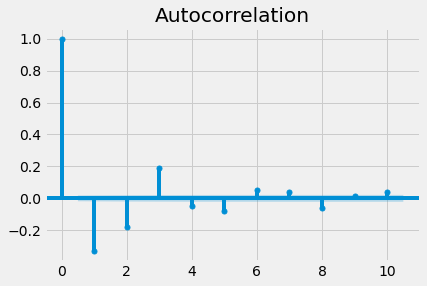

In [15]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plot_acf(df_all["price"].diff().dropna(),lags=10)
    fig_file = os.path.join(save_dir, "02-acf.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

<Figure size 1296x720 with 0 Axes>

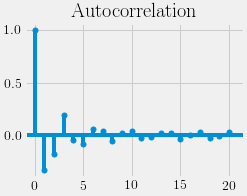

In [111]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plot_acf(df_all['price'].diff().dropna().values,lags=20)
    fig_file = os.path.join(save_dir, "02-acf.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

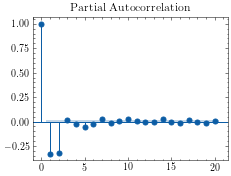

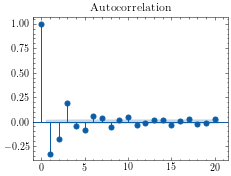

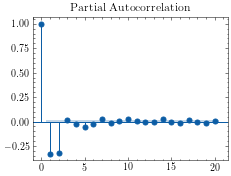

In [110]:

plot_pacf(df_all['price'].diff().dropna().values,lags=20)

In [16]:
window_size = 5

### Midprice cariance

In [17]:
def Midprice_variance(df,w=5,col = "price"):
    temp = df[col]
    for i in range(1,w):
        temp= temp+df[col].shift(i)
    temp = temp/w
    return temp
    
    

In [18]:
Midprice_variance(df_all,w = window_size).head(7)

timestamp
2022-05-31 01:05:06.391000+00:00        NaN
2022-05-31 01:05:33.394000+00:00        NaN
2022-05-31 01:05:47.096000+00:00        NaN
2022-05-31 01:05:55.858000+00:00        NaN
2022-05-31 01:07:04.934000+00:00    31557.8
2022-05-31 01:07:47.576000+00:00    31550.3
2022-05-31 01:10:06.537000+00:00    31550.7
Name: price, dtype: float64

In [19]:
df_all["Midprice_variance"] = Midprice_variance(df_all,w = window_size)

### Signed trade size variance

In [20]:
df_all["signed_side"] = df_all["side"].apply(lambda x: 1 if x == "Buy" else -1)

In [21]:
df_all["signed_side"]

timestamp
2022-05-31 01:05:06.391000+00:00    1
2022-05-31 01:05:33.394000+00:00   -1
2022-05-31 01:05:47.096000+00:00   -1
2022-05-31 01:05:55.858000+00:00   -1
2022-05-31 01:07:04.934000+00:00    1
                                   ..
2022-06-03 23:59:15.103000+00:00   -1
2022-06-03 23:59:15.103000+00:00   -1
2022-06-03 23:59:15.103000+00:00   -1
2022-06-03 23:59:15.103000+00:00   -1
2022-06-03 23:59:47.481000+00:00    1
Name: signed_side, Length: 11638, dtype: int64

In [22]:
def Signed_trade_size_variance(df,w=5,col = "size"):
    temp = df[col]*df[col]
    for i in range(1,w):
        temp= temp+(df[col].shift(i))*(df["signed_side"].shift(i))
    temp = temp/w
    return temp

In [23]:
Signed_trade_size_variance(df_all)

timestamp
2022-05-31 01:05:06.391000+00:00         NaN
2022-05-31 01:05:33.394000+00:00         NaN
2022-05-31 01:05:47.096000+00:00         NaN
2022-05-31 01:05:55.858000+00:00         NaN
2022-05-31 01:07:04.934000+00:00      1940.0
                                      ...   
2022-06-03 23:59:15.103000+00:00      2200.0
2022-06-03 23:59:15.103000+00:00      2200.0
2022-06-03 23:59:15.103000+00:00      2200.0
2022-06-03 23:59:15.103000+00:00    161920.0
2022-06-03 23:59:47.481000+00:00    199760.0
Length: 11638, dtype: float64

In [24]:
df_all["Signed_trade_size_variance"] = Signed_trade_size_variance(df_all)

### Bid–ask imbalance

In [25]:
df_all.columns

Index(['date', 'time', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional',
       ...
       'Asksize6lag10', 'Bidsize7lag10', 'Asksize7lag10', 'Bidsize8lag10',
       'Asksize8lag10', 'Bidsize9lag10', 'Asksize9lag10', 'Midprice_variance',
       'signed_side', 'Signed_trade_size_variance'],
      dtype='object', length=454)

In [26]:
def Bid_ask_imbalance(data):
    return (data['Bidsize0']-data['Asksize0'])/(data['Bidsize0']+data['Asksize0'])
    
df_all.apply(Bid_ask_imbalance,axis = 1)

timestamp
2022-05-31 01:05:06.391000+00:00    0.969231
2022-05-31 01:05:33.394000+00:00    0.969231
2022-05-31 01:05:47.096000+00:00    0.968750
2022-05-31 01:05:55.858000+00:00    0.967742
2022-05-31 01:07:04.934000+00:00    0.967742
                                      ...   
2022-06-03 23:59:15.103000+00:00   -0.997543
2022-06-03 23:59:15.103000+00:00   -0.997543
2022-06-03 23:59:15.103000+00:00   -0.997543
2022-06-03 23:59:15.103000+00:00   -0.997543
2022-06-03 23:59:47.481000+00:00   -0.997543
Length: 11638, dtype: float64

In [27]:
def Bid_ask_imbalance_muti(data):
    bid = sum(data[f'Bidsize{i}'] for i in range(10))
    ask = sum(data[f'Asksize{i}'] for i in range(10))
#     print((bid-ask)/(bid+ask))
#     print("ok")
    return (bid-ask)/(bid+ask)
    
df_all.apply(Bid_ask_imbalance_muti,axis = 1)

timestamp
2022-05-31 01:05:06.391000+00:00   -0.245417
2022-05-31 01:05:33.394000+00:00   -0.150372
2022-05-31 01:05:47.096000+00:00   -0.150594
2022-05-31 01:05:55.858000+00:00   -0.151038
2022-05-31 01:07:04.934000+00:00   -0.186737
                                      ...   
2022-06-03 23:59:15.103000+00:00   -0.832680
2022-06-03 23:59:15.103000+00:00   -0.832680
2022-06-03 23:59:15.103000+00:00   -0.832680
2022-06-03 23:59:15.103000+00:00   -0.832680
2022-06-03 23:59:47.481000+00:00   -0.350863
Length: 11638, dtype: float64

In [28]:
df_all["Bid_ask_imbalance"] = df_all.apply(Bid_ask_imbalance,axis = 1)

In [29]:
df_all["Bid_ask_imbalance_muti"] = df_all.apply(Bid_ask_imbalance_muti,axis = 1)

### Bid And Ask Imbalance

In [30]:
def Bid_imbalance(data,split_num = 5):
    bid_top = sum(data[f'Bidsize{i}'] for i in range(split_num))
    bid_bottom = sum(data[f'Bidsize{i}'] for i in range(split_num,10))
    
    return (bid_top-bid_bottom)/(bid_top+bid_bottom)
    
# df_all.apply(Bid_imbalance,axis = 1)

In [31]:
def Ask_imbalance(data,split_num = 5):
    ask_top = sum(data[f'Asksize{i}'] for i in range(split_num))
    ask_bottom = sum(data[f'Asksize{i}'] for i in range(split_num,10))
    
    return (ask_top-ask_bottom)/(ask_top+ask_bottom)
    
# df_all.apply(Ask_imbalance,axis = 1)

In [32]:
df_all["Bid_imbalance"] = df_all.apply(Bid_imbalance,axis = 1)

In [33]:
df_all["Ask_imbalance"] = df_all.apply(Ask_imbalance,axis = 1)

### Volume_Order_Imbalance

In [34]:
def Volume_Order_Imbalance(data,num=0):
    temp_1 = data[f'Bid{num}'] - data[f'Bid{num}lag1']
    if temp_1 >0:
        v_1 = data[f'Bidsize{num}']
    elif temp_1<0:
        v_1 = 0
    else:
        v_1 = data[f'Bidsize{num}']-data[f'Bidsize{num}lag1']
    # 此处未完成
    temp_2 = data[f'Ask{num}'] - data[f'Ask{num}lag1']
    if temp_2 >0:
        v_2 = 0
    elif temp_2<0:
        v_2 = data[f'Asksize{num}']
    else:
        v_2 = data[f'Asksize{num}']-data[f'Asksize{num}lag1']
    VOI = v_1-v_2
    return VOI
df_all.apply(Volume_Order_Imbalance,axis = 1)

timestamp
2022-05-31 01:05:06.391000+00:00      NaN
2022-05-31 01:05:33.394000+00:00      0.0
2022-05-31 01:05:47.096000+00:00   -100.0
2022-05-31 01:05:55.858000+00:00   -200.0
2022-05-31 01:07:04.934000+00:00   -100.0
                                    ...  
2022-06-03 23:59:15.103000+00:00      0.0
2022-06-03 23:59:15.103000+00:00      0.0
2022-06-03 23:59:15.103000+00:00      0.0
2022-06-03 23:59:15.103000+00:00      0.0
2022-06-03 23:59:47.481000+00:00      0.0
Length: 11638, dtype: float64

In [35]:
df_all["Volume_Order_Imbalance"] = df_all.apply(Volume_Order_Imbalance,axis = 1)

In [36]:
def Volume_Order_Imbalance_muti(data,num=0):
    pass 

### Trade Flow Imbalance

In [37]:
pass

### Return

In [38]:
df_all.columns

Index(['date', 'time', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional',
       ...
       'Bidsize9lag10', 'Asksize9lag10', 'Midprice_variance', 'signed_side',
       'Signed_trade_size_variance', 'Bid_ask_imbalance',
       'Bid_ask_imbalance_muti', 'Bid_imbalance', 'Ask_imbalance',
       'Volume_Order_Imbalance'],
      dtype='object', length=459)

In [39]:
def Midprice(data,num = 0):
    return (data[f'Bid{num}'] + data[f'Ask{num}'])/2
df_all.apply(Midprice,axis = 1)

timestamp
2022-05-31 01:05:06.391000+00:00    31565.00
2022-05-31 01:05:33.394000+00:00    31565.50
2022-05-31 01:05:47.096000+00:00    31565.50
2022-05-31 01:05:55.858000+00:00    31565.50
2022-05-31 01:07:04.934000+00:00    31562.00
                                      ...   
2022-06-03 23:59:15.103000+00:00    29707.25
2022-06-03 23:59:15.103000+00:00    29707.25
2022-06-03 23:59:15.103000+00:00    29707.25
2022-06-03 23:59:15.103000+00:00    29707.25
2022-06-03 23:59:47.481000+00:00    29689.00
Length: 11638, dtype: float64

### diff_price

In [40]:
def diff_price(df,steps=10,col = "price"):
    return pd.concat(
    {f'diff_price_step_{i}':df["price"].(_)(i)-df["price"]
    for i in range(1,steps+1)},
    axis = 1
    
    )

In [41]:
df_all = pd.concat([df_all,diff_price(df_all)],axis = 1)

In [42]:
df_all.head(12)

date             time  symbol  side  \
timestamp                                                                     
2022-05-31 01:05:06.391000+00:00  2022-05-31  01:05:06.391000  XBTUSD   Buy   
2022-05-31 01:05:33.394000+00:00  2022-05-31  01:05:33.394000  XBTUSD  Sell   
2022-05-31 01:05:47.096000+00:00  2022-05-31  01:05:47.096000  XBTUSD  Sell   
2022-05-31 01:05:55.858000+00:00  2022-05-31  01:05:55.858000  XBTUSD  Sell   
2022-05-31 01:07:04.934000+00:00  2022-05-31  01:07:04.934000  XBTUSD   Buy   
2022-05-31 01:07:47.576000+00:00  2022-05-31  01:07:47.576000  XBTUSD  Sell   
2022-05-31 01:10:06.537000+00:00  2022-05-31  01:10:06.537000  XBTUSD   Buy   
2022-05-31 01:10:16.746000+00:00  2022-05-31  01:10:16.746000  XBTUSD  Sell   
2022-05-31 01:10:16.753000+00:00  2022-05-31  01:10:16.753000  XBTUSD  Sell   
2022-05-31 03:05:59.166000+00:00  2022-05-31  03:05:59.166000  XBTUSD   Buy   
2022-05-31 03:08:16.725000+00:00  2022-05-31  03:08:16.725000  XBTUSD   Buy   
2022-05-31 03:09:16.742000+00:00  2022-05-31  03:09:16.742000  XBTUSD   Buy   

                                  size    price  tickDirection  \
timestamp                                                        
2022-05-31 01:05:06.391000+00:00   100  31581.5       PlusTick   
2022-05-31 01:05:33.394000+00:00   100  31544.0      MinusTick   
2022-05-31 01:05:47.096000+00:00   200  31544.0  ZeroMinusTick   
2022-05-31 01:05:55.858000+00:00   100  31544.0  ZeroMinusTick   
2022-05-31 01:07:04.934000+00:00   100  31575.5       PlusTick   
2022-05-31 01:07:47.576000+00:00   400  31544.0      MinusTick   
2022-05-31 01:10:06.537000+00:00   100  31546.0       PlusTick   
2022-05-31 01:10:16.746000+00:00   100  31544.0      MinusTick   
2022-05-31 01:10:16.753000+00:00   100  31544.0  ZeroMinusTick   
2022-05-31 03:05:59.166000+00:00   400  31730.0       PlusTick   
2022-05-31 03:08:16.725000+00:00   100  31730.0   ZeroPlusTick   
2022-05-31 03:09:16.742000+00:00   100  31730.0   ZeroPlusTick   

                                                            trdMatchID  \
timestamp                                                                
2022-05-31 01:05:06.391000+00:00  4cba8821-4b2b-efc1-9b3c-f10d545e3fb5   
2022-05-31 01:05:33.394000+00:00  597530d4-5f27-c120-eb67-db7640c64d02   
2022-05-31 01:05:47.096000+00:00  6f460707-ab90-aa01-c80a-b1523c36897b   
2022-05-31 01:05:55.858000+00:00  dc70a11b-6aaa-3027-1f5c-46227e72d184   
2022-05-31 01:07:04.934000+00:00  991ba5f0-ee88-0b95-f4e5-42d9dbb92590   
2022-05-31 01:07:47.576000+00:00  edd610a2-b608-39f6-e8b7-cc68e4ea9146   
2022-05-31 01:10:06.537000+00:00  f2b7f8aa-3fec-930b-3540-bdcf73cf0c8b   
2022-05-31 01:10:16.746000+00:00  e5768c9e-02d8-f6da-472d-558884cb6136   
2022-05-31 01:10:16.753000+00:00  2a92e1f1-2652-5934-0538-f31020f633c1   
2022-05-31 03:05:59.166000+00:00  2debe495-d7da-e73a-c76d-4d6d4bf4cf45   
2022-05-31 03:08:16.725000+00:00  dcd59ed2-c212-9153-5d23-484d3780ac61   
2022-05-31 03:09:16.742000+00:00  680c7bef-3b71-8c91-d887-83f999a2d558   

                                  grossValue  homeNotional  ...  \
timestamp                                                   ...   
2022-05-31 01:05:06.391000+00:00      316641      0.003166  ...   
2022-05-31 01:05:33.394000+00:00      317017      0.003170  ...   
2022-05-31 01:05:47.096000+00:00      634034      0.006340  ...   
2022-05-31 01:05:55.858000+00:00      317017      0.003170  ...   
2022-05-31 01:07:04.934000+00:00      316701      0.003167  ...   
2022-05-31 01:07:47.576000+00:00     1268068      0.012681  ...   
2022-05-31 01:10:06.537000+00:00      316997      0.003170  ...   
2022-05-31 01:10:16.746000+00:00      317017      0.003170  ...   
2022-05-31 01:10:16.753000+00:00      317017      0.003170  ...   
2022-05-31 03:05:59.166000+00:00     1260636      0.012606  ...   
2022-05-31 03:08:16.725000+00:00      315159      0.003152  ...   
2022-05-31 03:09:16.742000+00:00      315159      0.003152  ...   

                                

In [43]:

with open("df_feature.pkl",'wb') as file:
    pickle.dump(df_all,file)